# Data science Lab 1

## Cluster-based Classification for Client Errors in Content Delivery Networks (CDN)

### Shahid Gulzar Padder 
###### Neptun id: XPXSKK

### Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import random as rnd

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading Dataset and describing

In [207]:
dataset = pd.read_csv('C:/Users/shahi/CDN Client Error_dataset.csv')# No delimiter like ","or ";"

In [208]:
dataset

,channel_id,timestamp,host_id,content_type,protocol,content_id,geo_location,user_id
0,8,5/13/2088 9:19,156,8,1,NaN,1303,0.0
1,8,5/13/2088 8:58,156,8,1,NaN,1514,0.0
2,8,5/13/2088 9:39,156,2,1,NaN,1,13.0
3,8,5/13/2088 9:54,156,8,1,NaN,1,0.0
4,8,5/13/2088 10:04,156,8,1,NaN,1,0.0
...,...,...,...,...,...,...,...,...
88430,8,5/19/2088 4:18,156,2,1,NaN,1,13.0
88431,2,5/19/2088 1:53,123,4,1,NaN,1121,7.0
88432,8,5/19/2088 3:16,156,8,1,NaN,1,0.0
88433,8,5/19/2088 3:21,156,2,1,NaN,1,13.0


In [209]:
print(dataset.columns.values) # Different feature names

['channel_id' 'timestamp' 'host_id' 'content_type' 'protocol' 'content_id'
 'geo_location' 'user_id']


In [210]:
dataset.shape

(88435, 8)

## EDA

In [211]:
for column in dataset:
    un_v = np.unique(dataset[column])
    nr_v = len(un_v)
    if nr_v < 10:
        print('No. of val for attribute {} :{} -- {}'.format(column, nr_v,un_v))
    else:
        print('No. of val for attribute {} :{}'.format(column, nr_v))

No. of val for attribute channel_id :8 -- [1 2 3 4 5 6 7 8]
No. of val for attribute timestamp :8032
No. of val for attribute host_id :157
No. of val for attribute content_type :9 -- [0 1 2 3 4 5 6 7 8]
No. of val for attribute protocol :2 -- [0 1]
No. of val for attribute content_id :88420
No. of val for attribute geo_location :1587
No. of val for attribute user_id :329


In [212]:
dataset.isnull().values.any()

True

In [213]:
dataset.isnull().sum(axis = 0)

channel_id          0
timestamp           0
host_id             0
content_type        0
protocol            0
content_id      88409
geo_location        0
user_id           292
dtype: int64

In [214]:
# Different missing values that can be there 
miss_v = ["n/a", "na", "--", "NaN", "NA"]

In [215]:
miss_v

['n/a', 'na', '--', 'NaN', 'NA']

In [216]:
df = pd.read_csv('C:/Users/shahi/CDN Client Error_dataset.csv', na_values = miss_v)

In [217]:
df

,channel_id,timestamp,host_id,content_type,protocol,content_id,geo_location,user_id
0,8,5/13/2088 9:19,156,8,1,NaN,1303,0.0
1,8,5/13/2088 8:58,156,8,1,NaN,1514,0.0
2,8,5/13/2088 9:39,156,2,1,NaN,1,13.0
3,8,5/13/2088 9:54,156,8,1,NaN,1,0.0
4,8,5/13/2088 10:04,156,8,1,NaN,1,0.0
...,...,...,...,...,...,...,...,...
88430,8,5/19/2088 4:18,156,2,1,NaN,1,13.0
88431,2,5/19/2088 1:53,123,4,1,NaN,1121,7.0
88432,8,5/19/2088 3:16,156,8,1,NaN,1,0.0
88433,8,5/19/2088 3:21,156,2,1,NaN,1,13.0


In [218]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88435 entries, 0 to 88434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   channel_id    88435 non-null  int64  
 1   timestamp     88435 non-null  object 
 2   host_id       88435 non-null  int64  
 3   content_type  88435 non-null  int64  
 4   protocol      88435 non-null  int64  
 5   content_id    26 non-null     float64
 6   geo_location  88435 non-null  int64  
 7   user_id       88143 non-null  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 5.4+ MB


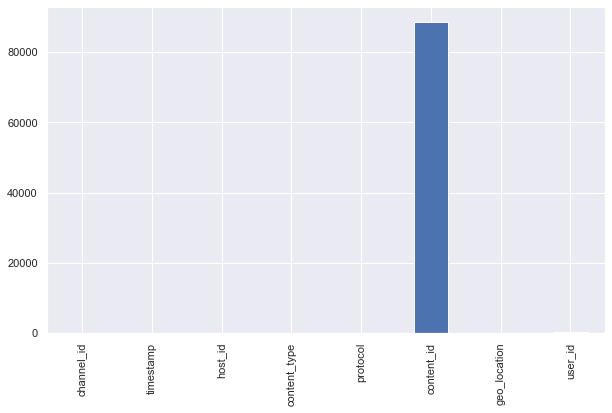

In [220]:
dataset.isnull().sum().plot.bar(x="Features", y="Missing Values")
plt.savefig('missing_ds1.png')

In [221]:
dataset.nunique()

channel_id         8
timestamp       8032
host_id          157
content_type       9
protocol           2
content_id        11
geo_location    1587
user_id           37
dtype: int64

In [222]:
sns.set(rc={'figure.figsize':(10,6)})

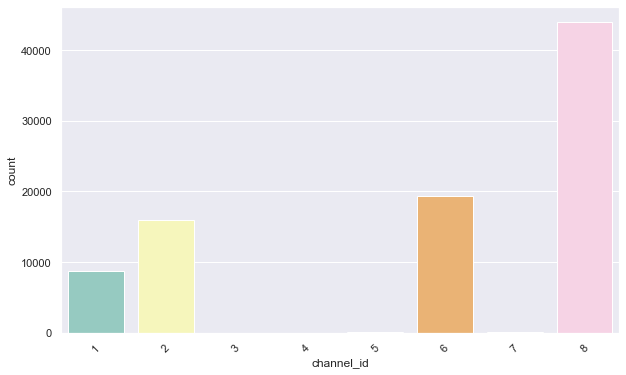

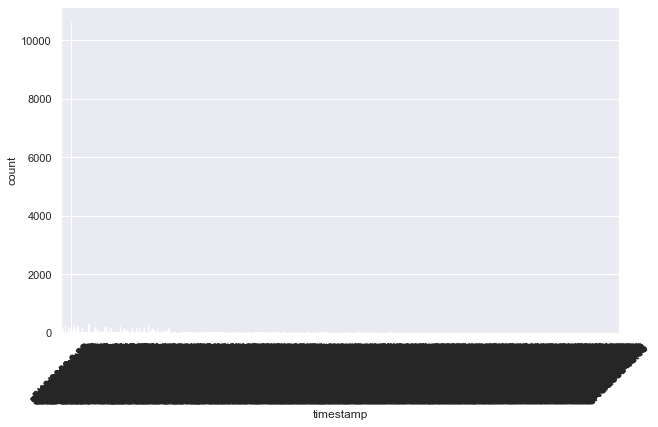

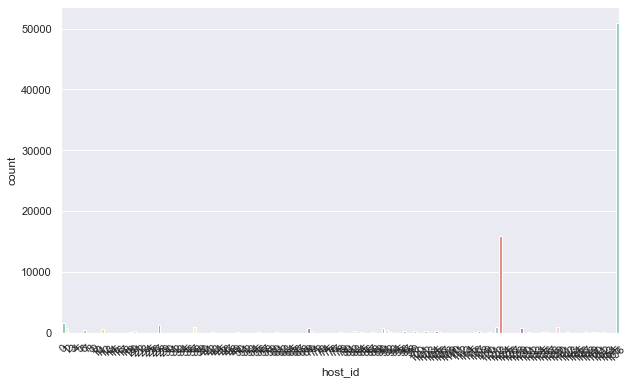

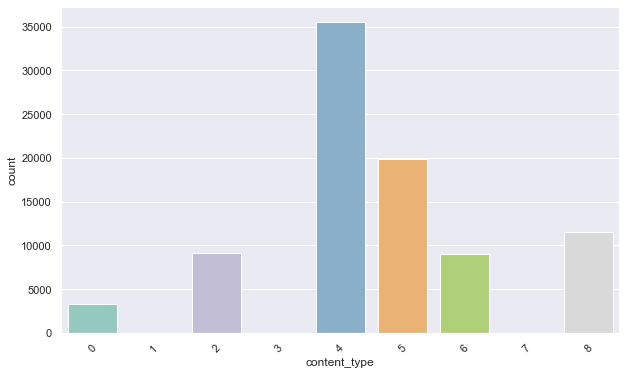

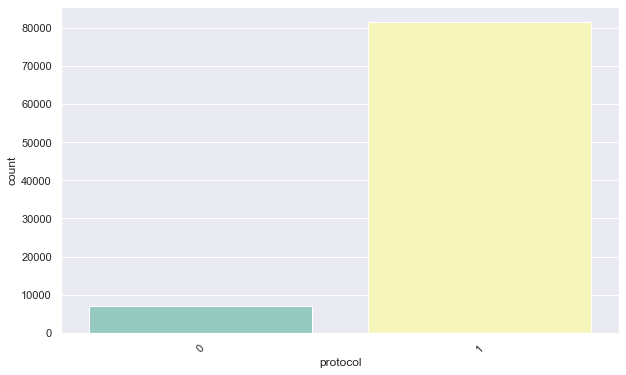

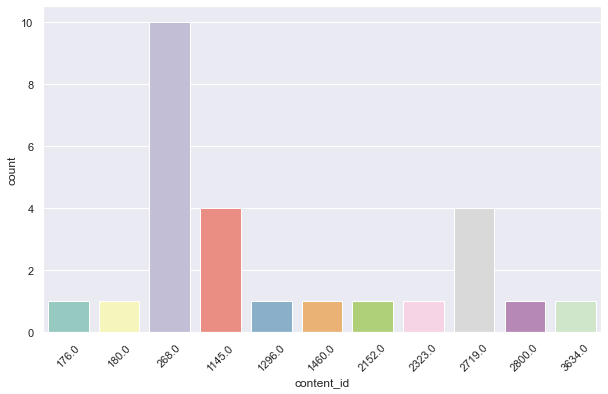

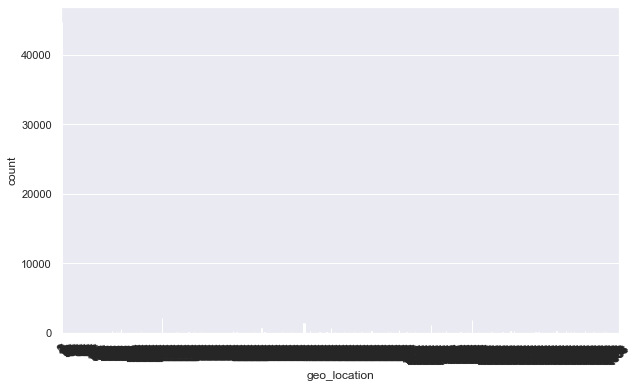

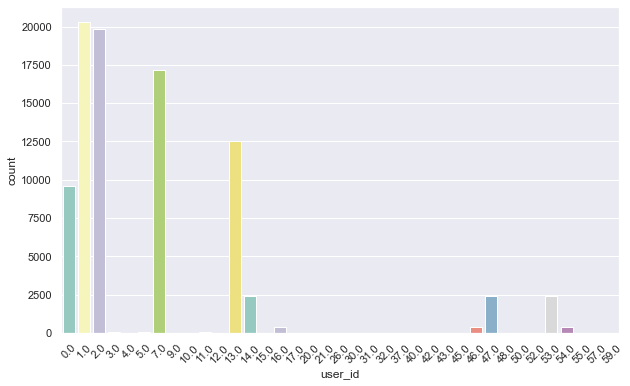

In [17]:
#Analysing the metioned features in descrption file
attributes = ['channel_id', 'timestamp', 'host_id', 'content_type', 'protocol', 'content_id',
 'geo_location', 'user_id']

for f in attributes:
    sns.countplot(x = f, data = dataset, palette = 'Set3')
    plt.xticks(rotation=45)
    plt.savefig('f')
    plt.show()

In [223]:
#Checking for the outliers
pd.DataFrame.describe(dataset)

,channel_id,host_id,content_type,protocol,content_id,geo_location,user_id
count,88435.000000,88435.000000,88435.000000,88435.000000,26.000000,88435.000000,88143.000000
mean,5.774083,129.702686,4.592684,0.920812,1236.807692,238.944502,7.577925
std,2.704121,42.296910,1.843104,0.270034,1108.334607,433.651243,12.023056
min,1.000000,0.000000,0.000000,0.000000,176.000000,0.000000,0.000000
25%,2.000000,123.000000,4.000000,1.000000,268.000000,1.000000,1.000000
50%,6.000000,156.000000,4.000000,1.000000,1145.000000,1.000000,2.000000
75%,8.000000,156.000000,5.000000,1.000000,2280.250000,285.000000,7.000000
max,8.000000,156.000000,8.000000,1.000000,3634.000000,1586.000000,59.000000


<AxesSubplot:>

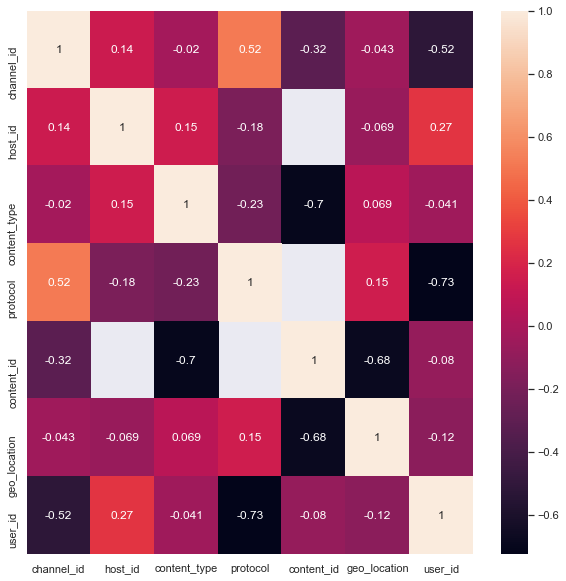

In [224]:
#Heat map to know the correlation between features
plt.figure(figsize = (10,10))
sns.heatmap(dataset.corr(), annot=True)

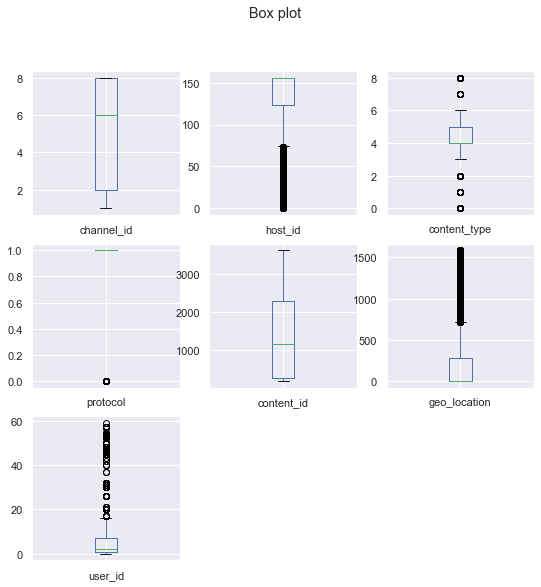

In [225]:
#Checking for outliers using box plot
import matplotlib.pyplot as plt
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box plot')
plt.savefig('Box plot1')
plt.show()

#### Handling the null values

In [226]:
updated_df=dataset

In [227]:
updated_df['user_id']=updated_df['user_id'].fillna(updated_df['user_id'].mean())

In [228]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88435 entries, 0 to 88434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   channel_id    88435 non-null  int64  
 1   timestamp     88435 non-null  object 
 2   host_id       88435 non-null  int64  
 3   content_type  88435 non-null  int64  
 4   protocol      88435 non-null  int64  
 5   content_id    26 non-null     float64
 6   geo_location  88435 non-null  int64  
 7   user_id       88435 non-null  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 5.4+ MB


In [229]:
updated_df

,channel_id,timestamp,host_id,content_type,protocol,content_id,geo_location,user_id
0,8,5/13/2088 9:19,156,8,1,NaN,1303,0.0
1,8,5/13/2088 8:58,156,8,1,NaN,1514,0.0
2,8,5/13/2088 9:39,156,2,1,NaN,1,13.0
3,8,5/13/2088 9:54,156,8,1,NaN,1,0.0
4,8,5/13/2088 10:04,156,8,1,NaN,1,0.0
...,...,...,...,...,...,...,...,...
88430,8,5/19/2088 4:18,156,2,1,NaN,1,13.0
88431,2,5/19/2088 1:53,123,4,1,NaN,1121,7.0
88432,8,5/19/2088 3:16,156,8,1,NaN,1,0.0
88433,8,5/19/2088 3:21,156,2,1,NaN,1,13.0


In [230]:
updated_df.isnull().sum(axis = 0)

channel_id          0
timestamp           0
host_id             0
content_type        0
protocol            0
content_id      88409
geo_location        0
user_id             0
dtype: int64

In [231]:
updated_df=updated_df.drop(columns=['timestamp','content_id'])

### Selecting most frequent ones

In [232]:
Geo=updated_df['geo_location'].value_counts()

In [233]:
print(Geo.to_string())

1       44654
0       18005
285      2106
1167     1920
693      1422
688      1387
1051     1169
767       699
569       639
169       574
960       478
1287      310
144       307
1407      304
882       296
1408      266
706       250
1435      245
1277      243
1093      206
1488      202
487       199
1083      182
577       170
778       165
875       163
396       156
1254      155
1586      145
929       143
1514      140
938       139
1512      139
1542      132
376       129
1135      124
1457      121
1157      112
498       106
167       105
1221      104
653       102
1549      102
628       101
1397       94
548        93
1357       93
361        92
734        90
1450       82
754        78
161        76
1348       75
331        72
1134       72
156        71
1185       70
226        68
326        68
1224       68
981        63
1071       59
851        58
831        56
855        56
804        54
1440       54
1005       53
499        52
454        49
675        48
1571  

In [234]:
updated_df2 = updated_df[updated_df['geo_location'].map(updated_df['geo_location'].value_counts()).gt(100)]

In [235]:
updated_df2['geo_location'].value_counts()

1       44654
0       18005
285      2106
1167     1920
693      1422
688      1387
1051     1169
767       699
569       639
169       574
960       478
1287      310
144       307
1407      304
882       296
1408      266
706       250
1435      245
1277      243
1093      206
1488      202
487       199
1083      182
577       170
778       165
875       163
396       156
1254      155
1586      145
929       143
1514      140
938       139
1512      139
1542      132
376       129
1135      124
1457      121
1157      112
498       106
167       105
1221      104
653       102
1549      102
628       101
Name: geo_location, dtype: int64

In [236]:
updated_df2

,channel_id,host_id,content_type,protocol,geo_location,user_id
1,8,156,8,1,1514,0.0
2,8,156,2,1,1,13.0
3,8,156,8,1,1,0.0
4,8,156,8,1,1,0.0
5,8,156,2,1,1,13.0
...,...,...,...,...,...,...
88429,8,156,5,1,1,2.0
88430,8,156,2,1,1,13.0
88432,8,156,8,1,1,0.0
88433,8,156,2,1,1,13.0


In [237]:
updated_df2.nunique()

channel_id        8
host_id         147
content_type      8
protocol          2
geo_location     44
user_id          33
dtype: int64

### Selecting frequent hosts from the list

In [238]:
Hosts=updated_df2['host_id'].value_counts()

In [239]:
print(Hosts.to_string())

156    47128
123    13522
0       1297
27       985
129      868
37       865
69       818
122      776
90       748
139      746
11       680
1        615
6        500
96       422
102      380
91       377
99       351
20       333
82       329
70       309
117      306
105      268
78       264
131      216
136      215
116      215
152      170
84       170
142      164
149      159
92       158
135      149
60       145
42       143
19       142
49       136
150      130
147      129
72       118
140      111
4        111
87       107
55       106
106      100
76       100
94        98
115       95
63        93
2         92
18        92
98        86
111       77
128       70
124       68
32        68
80        66
73        61
132       60
114       58
57        54
148       54
101       52
113       51
66        51
48        51
12        49
53        47
68        47
109       44
5         44
143       43
85        42
47        41
28        38
39        37
46        34
130       33

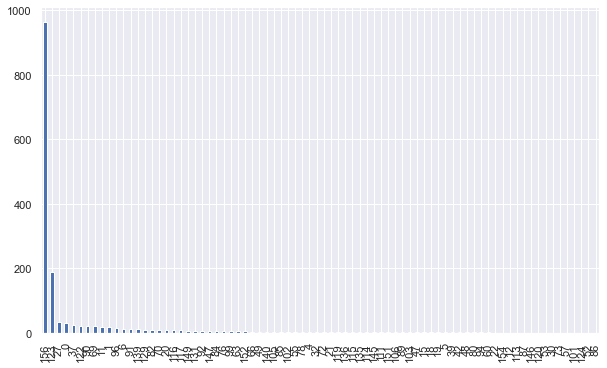

In [241]:
updated_df['host_id'][:1600].value_counts().plot(kind='bar')
plt.savefig('host_freq.png')


## Hosts 0, 1, 11 are the top three hosts according to our requirements

In [242]:
#Hosts 0,1,11 are the top three hosts according to our requirements 

# Host 0

In [386]:
Host_0=updated_df2.loc[updated_df2['host_id'] == 0]

In [387]:
Host0_lb=updated_df2.loc[updated_df2['host_id'] == 0]

In [388]:
Host0_lb=Host0_lb.drop(columns=['host_id'])

In [389]:
Host_0

,channel_id,host_id,content_type,protocol,geo_location,user_id
221,6,0,4,1,1,1.0
228,6,0,4,1,1,1.0
255,6,0,4,1,1,1.0
261,6,0,4,1,1408,1.0
264,6,0,4,1,1,1.0
...,...,...,...,...,...,...
87791,6,0,4,1,1,1.0
87820,6,0,4,1,1,1.0
87858,6,0,4,1,1,1.0
87918,6,0,4,1,0,1.0


In [390]:
Host_0.nunique()

channel_id      2
host_id         1
content_type    1
protocol        1
geo_location    8
user_id         1
dtype: int64

In [391]:
#Host_0=Host_0.drop_duplicates()

In [392]:
Host_0

,channel_id,host_id,content_type,protocol,geo_location,user_id
221,6,0,4,1,1,1.0
228,6,0,4,1,1,1.0
255,6,0,4,1,1,1.0
261,6,0,4,1,1408,1.0
264,6,0,4,1,1,1.0
...,...,...,...,...,...,...
87791,6,0,4,1,1,1.0
87820,6,0,4,1,1,1.0
87858,6,0,4,1,1,1.0
87918,6,0,4,1,0,1.0


In [393]:
from sklearn.preprocessing import OneHotEncoder
Final_df1=pd.get_dummies(data=Host_0, columns=['channel_id','geo_location','content_type','protocol','user_id'])

In [394]:
Final_df1

,host_id,channel_id_5,channel_id_6,geo_location_0,geo_location_1,geo_location_167,geo_location_498,geo_location_706,geo_location_882,geo_location_1407,geo_location_1408,content_type_4,protocol_1,user_id_1.0
221,0,0,1,0,1,0,0,0,0,0,0,1,1,1
228,0,0,1,0,1,0,0,0,0,0,0,1,1,1
255,0,0,1,0,1,0,0,0,0,0,0,1,1,1
261,0,0,1,0,0,0,0,0,0,0,1,1,1,1
264,0,0,1,0,1,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87791,0,0,1,0,1,0,0,0,0,0,0,1,1,1
87820,0,0,1,0,1,0,0,0,0,0,0,1,1,1
87858,0,0,1,0,1,0,0,0,0,0,0,1,1,1
87918,0,0,1,1,0,0,0,0,0,0,0,1,1,1


In [395]:
Final_df1=Final_df1.drop(columns=['host_id'])

In [396]:
Final_df1

,channel_id_5,channel_id_6,geo_location_0,geo_location_1,geo_location_167,geo_location_498,geo_location_706,geo_location_882,geo_location_1407,geo_location_1408,content_type_4,protocol_1,user_id_1.0
221,0,1,0,1,0,0,0,0,0,0,1,1,1
228,0,1,0,1,0,0,0,0,0,0,1,1,1
255,0,1,0,1,0,0,0,0,0,0,1,1,1
261,0,1,0,0,0,0,0,0,0,1,1,1,1
264,0,1,0,1,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87791,0,1,0,1,0,0,0,0,0,0,1,1,1
87820,0,1,0,1,0,0,0,0,0,0,1,1,1
87858,0,1,0,1,0,0,0,0,0,0,1,1,1
87918,0,1,1,0,0,0,0,0,0,0,1,1,1


In [397]:
#from sklearn.preprocessing import OneHotEncoder
#creating instance of one-hot-encoder
#encoder = OneHotEncoder(handle_unknown='ignore')
#perform one-hot encoding on 'team' column 
#encoder_df1 = pd.DataFrame(encoder.fit_transform(Host0[['channel_id','host_id','content_type','protocol','geo_location','user_id']]).toarray())
#merge one-hot encoded columns back with original DataFrame
#final_df=pd.concat([encoder_df,km_df], axis='columns')

In [398]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.cm as cm

For 2 clusters the average silhouette_score is : 0.8294816673984737
For 3 clusters the average silhouette_score is : 0.8888200586084248
For 4 clusters the average silhouette_score is : 0.9419748854799498
For 5 clusters the average silhouette_score is : 0.9654402253474964
For 6 clusters the average silhouette_score is : 0.9707597755191841


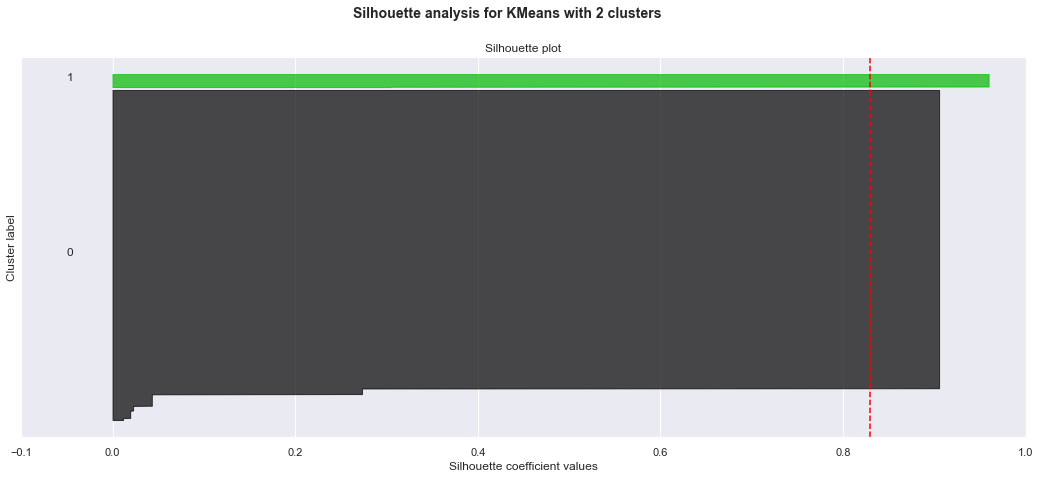

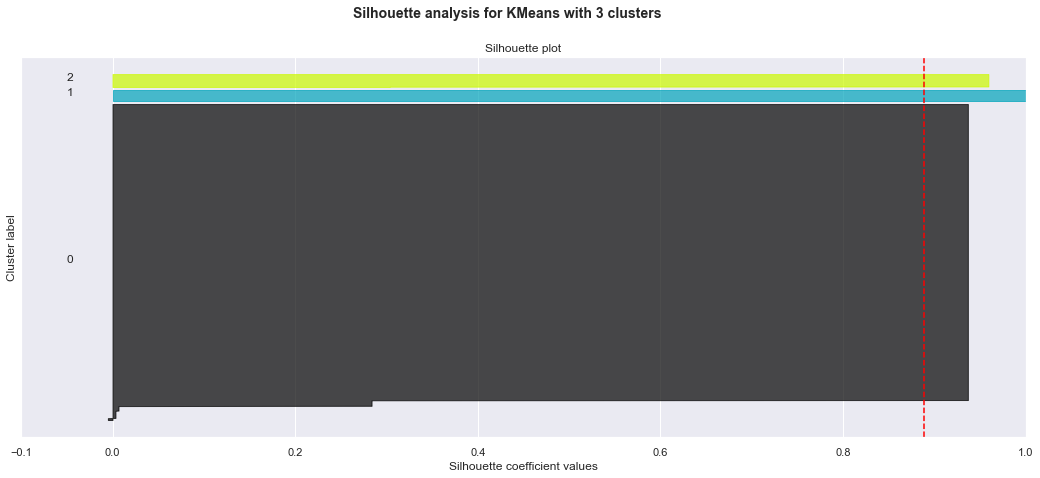

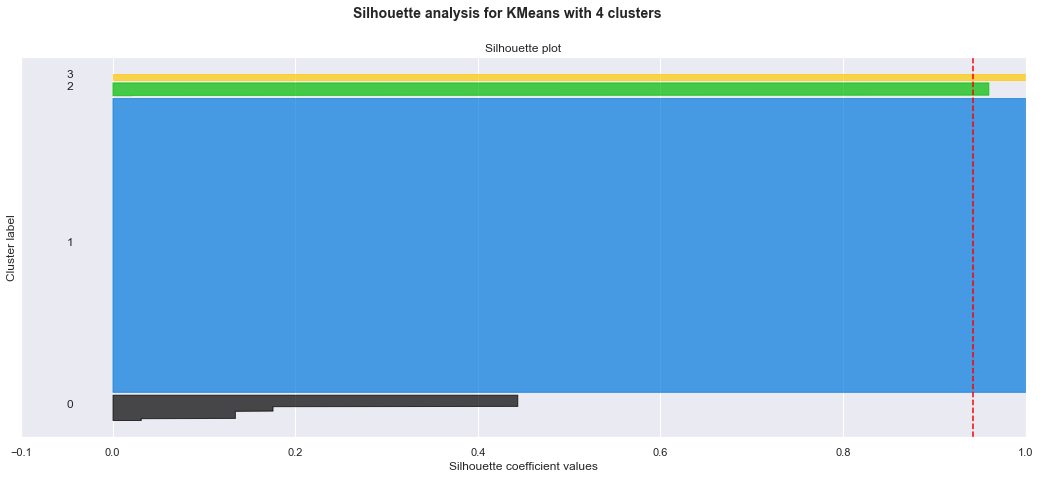

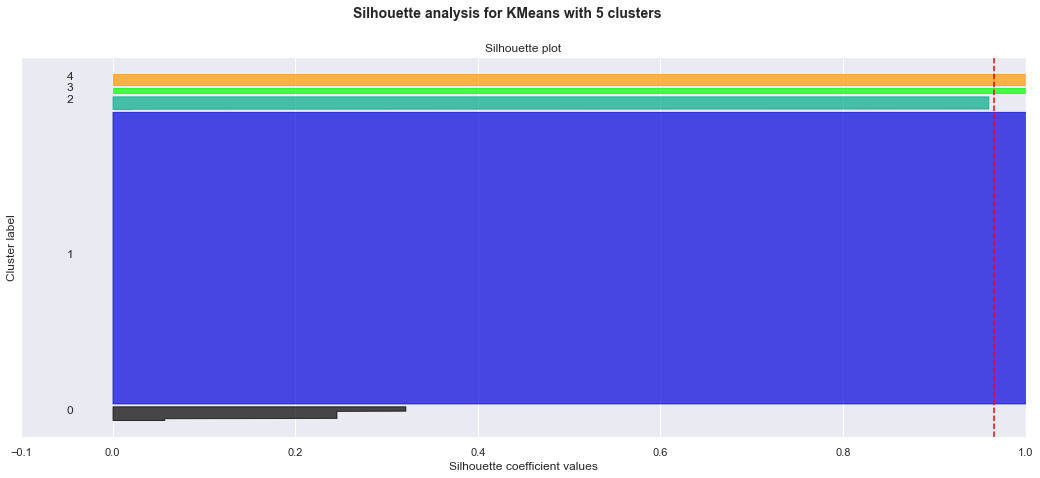

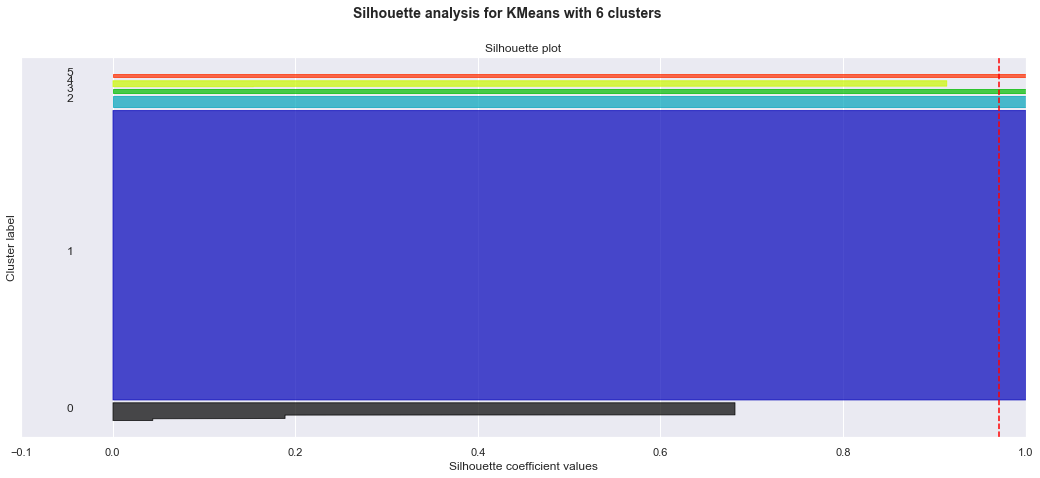

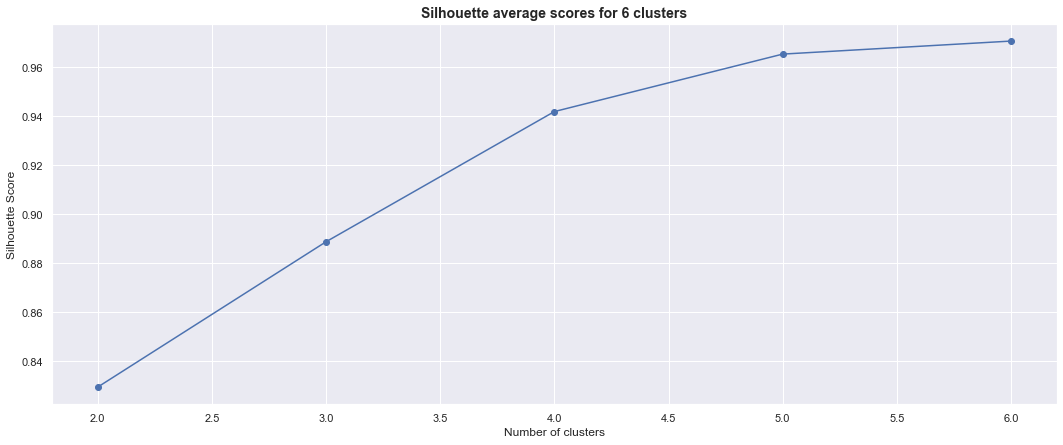

In [399]:
num_clusters = range(2,7) # we will analyse n_clusters from 2 to 7
silhouette_scores = []
SSE = []

for n_clusters in num_clusters:

    # Create a subplot
    fig, a = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initializing the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    kmeans.fit(Final_df1)

    labels_pred = kmeans.predict(Final_df1)

    #Computing the average silhouette_score
    sil_avg_score = metrics.silhouette_score(Final_df1, labels_pred)
    print("For",n_clusters, "clusters",
          "the average silhouette_score is :", sil_avg_score)

    # Computing the silhouette scores for each sample
    sil_samples_score = metrics.silhouette_samples(Final_df1, labels_pred)

    silhouette_scores.append(sil_avg_score)

    #Computing k means inertia for elbow analysis
    SSE.append(kmeans.inertia_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        sil_values = \
            sil_samples_score[labels_pred == i]
        sil_values.sort()

        size_cluster = sil_values.shape[0]
        y_upper = y_lower + size_cluster

        color = cm.nipy_spectral(float(i) / n_clusters)
        a.fill_betweenx(np.arange(y_lower, y_upper),
                          0, sil_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Adding cluster number label
        a.text(-0.05, y_lower + 0.5 * size_cluster, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting low plot limit to -0.1 since the aren't silhouettes from -0.1
    a.set_xlim([-0.1, 1])
    a.set_title("Silhouette plot")
    a.set_xlabel("Silhouette coefficient values")
    a.set_ylabel("Cluster label")

    # Adding line of average silhouette score
    a.axvline(x=sil_avg_score, color="red", linestyle="--")
    a.set_yticks([])  # Clear the yaxis labels / ticks
    a.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(('Silhouette analysis for KMeans with ' + str(n_clusters) + ' clusters'),
                 fontsize=14, fontweight='bold')

plt.show()

# Plot of silhouette average score values
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Silhouette average scores for ' + str(n_clusters) + ' clusters', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Silhouette Score')

plt.show()

C:\Users\shahi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


<Figure size 1080x504 with 0 Axes>

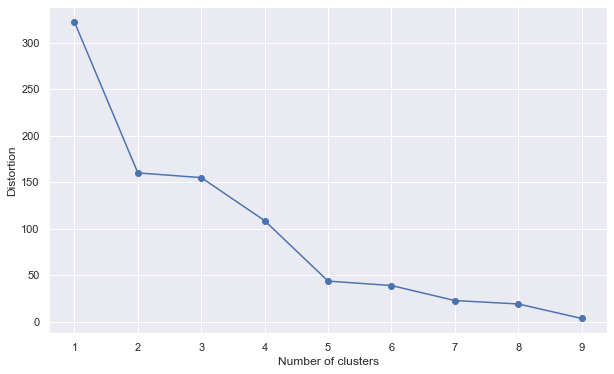

<Figure size 1080x504 with 0 Axes>

In [400]:
distortions = []
for i in range(1, 10):
    km = KMeans(n_clusters = i, init = 'random', n_init = 20, max_iter = 300, tol = 1e-04, random_state = 40)
    km.fit(Final_df1)
    distortions.append(km.inertia_)

    
# plot
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.savefig('kmeans')
plt.figure(figsize=(15,7))

In [401]:
kmeans = KMeans(n_clusters=2, random_state=10)
kmeans.fit(Host_0)
labels_0 = kmeans.predict(Host_0)

In [402]:
Final_df1["Cluster_0"]= labels_0

In [403]:
Final_df1

,channel_id_5,channel_id_6,geo_location_0,geo_location_1,geo_location_167,geo_location_498,geo_location_706,geo_location_882,geo_location_1407,geo_location_1408,content_type_4,protocol_1,user_id_1.0,Cluster_0
221,0,1,0,1,0,0,0,0,0,0,1,1,1,0
228,0,1,0,1,0,0,0,0,0,0,1,1,1,0
255,0,1,0,1,0,0,0,0,0,0,1,1,1,0
261,0,1,0,0,0,0,0,0,0,1,1,1,1,1
264,0,1,0,1,0,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87791,0,1,0,1,0,0,0,0,0,0,1,1,1,0
87820,0,1,0,1,0,0,0,0,0,0,1,1,1,0
87858,0,1,0,1,0,0,0,0,0,0,1,1,1,0
87918,0,1,1,0,0,0,0,0,0,0,1,1,1,0


In [404]:
Final_df1.nunique()

channel_id_5         2
channel_id_6         2
geo_location_0       2
geo_location_1       2
geo_location_167     2
geo_location_498     2
geo_location_706     2
geo_location_882     2
geo_location_1407    2
geo_location_1408    2
content_type_4       1
protocol_1           1
user_id_1.0          1
Cluster_0            2
dtype: int64

In [405]:
X= Final_df1.iloc[:, :-1]     #X is matrix of features and Y is dependent vector
y= Final_df1.iloc[:, 13].values

In [406]:
X

,channel_id_5,channel_id_6,geo_location_0,geo_location_1,geo_location_167,geo_location_498,geo_location_706,geo_location_882,geo_location_1407,geo_location_1408,content_type_4,protocol_1,user_id_1.0
221,0,1,0,1,0,0,0,0,0,0,1,1,1
228,0,1,0,1,0,0,0,0,0,0,1,1,1
255,0,1,0,1,0,0,0,0,0,0,1,1,1
261,0,1,0,0,0,0,0,0,0,1,1,1,1
264,0,1,0,1,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87791,0,1,0,1,0,0,0,0,0,0,1,1,1
87820,0,1,0,1,0,0,0,0,0,0,1,1,1
87858,0,1,0,1,0,0,0,0,0,0,1,1,1
87918,0,1,1,0,0,0,0,0,0,0,1,1,1


In [407]:
y

array([0, 0, 0, ..., 0, 0, 0])

## Train test split

In [408]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 40)

## Decision tree classifier 

In [409]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [410]:
y_predict = clf_model.predict(X_test)

In [411]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_predict)
from sklearn import svm
import pandas as pd
from sklearn.metrics import accuracy_score
# Create Linear SVM object
support = svm.LinearSVC(random_state=20)

In [412]:
# Train the model using the training sets and check score on test dataset
support.fit(X_train, y_train)
predicted= support.predict(X_test)
score=accuracy_score(y_test,predicted)
print("Your Model Accuracy is", score)

Your Model Accuracy is 1.0


In [413]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       246
           1       1.00      1.00      1.00        14

    accuracy                           1.00       260
   macro avg       1.00      1.00      1.00       260
weighted avg       1.00      1.00      1.00       260



In [414]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[246,   0],
       [  1,  13]], dtype=int64)

## Random Forest Classifier

In [415]:
from sklearn.ensemble import RandomForestClassifier
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  1.0


In [416]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       246
           1       1.00      1.00      1.00        14

    accuracy                           1.00       260
   macro avg       1.00      1.00      1.00       260
weighted avg       1.00      1.00      1.00       260



In [417]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[246,   0],
       [  0,  14]], dtype=int64)

In [418]:
#Hyperparamter tuning

In [419]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [420]:
%%time
classifier_rf.fit(X_train, y_train)

Wall time: 218 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [421]:
# checking the oob score
classifier_rf.oob_score_

1.0

In [422]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [423]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [424]:
from sklearn.model_selection import GridSearchCV

In [425]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [426]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
Wall time: 29.8 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [427]:
grid_search.best_score_

0.997104247104247

In [428]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=25,
                       n_jobs=-1, random_state=42)

# Host 1

In [429]:
Host_1=updated_df2.loc[updated_df2['host_id'] == 1]

In [430]:
Host1_lb=updated_df2.loc[updated_df2['host_id'] == 1]

In [431]:
Host1_lb=Host1_lb.drop(columns=['host_id'])

In [432]:
Host1_lb

,channel_id,content_type,protocol,geo_location,user_id
193,6,4,1,1,1.0
268,6,4,1,1,1.0
272,6,4,1,1,1.0
291,6,4,1,1,1.0
360,6,4,1,1,1.0
...,...,...,...,...,...
87711,6,4,1,0,1.0
87751,6,4,1,1,1.0
87758,5,4,1,1,1.0
87853,6,4,1,1,1.0


In [433]:
Host_1.nunique()

channel_id      3
host_id         1
content_type    2
protocol        1
geo_location    4
user_id         1
dtype: int64

In [434]:
#Host_1=Host_1.drop_duplicates()

In [435]:
Host_1

,channel_id,host_id,content_type,protocol,geo_location,user_id
193,6,1,4,1,1,1.0
268,6,1,4,1,1,1.0
272,6,1,4,1,1,1.0
291,6,1,4,1,1,1.0
360,6,1,4,1,1,1.0
...,...,...,...,...,...,...
87711,6,1,4,1,0,1.0
87751,6,1,4,1,1,1.0
87758,5,1,4,1,1,1.0
87853,6,1,4,1,1,1.0


In [436]:
from sklearn.preprocessing import OneHotEncoder
Final_df2=pd.get_dummies(data=Host_1, columns=['channel_id','content_type','geo_location','protocol','user_id'])

In [437]:
Final_df2

,host_id,channel_id_5,channel_id_6,channel_id_8,content_type_4,content_type_8,geo_location_0,geo_location_1,geo_location_167,geo_location_1254,protocol_1,user_id_1.0
193,1,0,1,0,1,0,0,1,0,0,1,1
268,1,0,1,0,1,0,0,1,0,0,1,1
272,1,0,1,0,1,0,0,1,0,0,1,1
291,1,0,1,0,1,0,0,1,0,0,1,1
360,1,0,1,0,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
87711,1,0,1,0,1,0,1,0,0,0,1,1
87751,1,0,1,0,1,0,0,1,0,0,1,1
87758,1,1,0,0,1,0,0,1,0,0,1,1
87853,1,0,1,0,1,0,0,1,0,0,1,1


In [438]:
Final_df2=Final_df2.drop(columns=['host_id'])

In [439]:
Final_df2

,channel_id_5,channel_id_6,channel_id_8,content_type_4,content_type_8,geo_location_0,geo_location_1,geo_location_167,geo_location_1254,protocol_1,user_id_1.0
193,0,1,0,1,0,0,1,0,0,1,1
268,0,1,0,1,0,0,1,0,0,1,1
272,0,1,0,1,0,0,1,0,0,1,1
291,0,1,0,1,0,0,1,0,0,1,1
360,0,1,0,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
87711,0,1,0,1,0,1,0,0,0,1,1
87751,0,1,0,1,0,0,1,0,0,1,1
87758,1,0,0,1,0,0,1,0,0,1,1
87853,0,1,0,1,0,0,1,0,0,1,1


In [440]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.cm as cm

For 2 clusters the average silhouette_score is : 0.8514735191803597
For 3 clusters the average silhouette_score is : 0.8811176282080319
For 4 clusters the average silhouette_score is : 0.9419717668514297
For 5 clusters the average silhouette_score is : 0.9742621321062543
For 6 clusters the average silhouette_score is : 0.9904625738691277


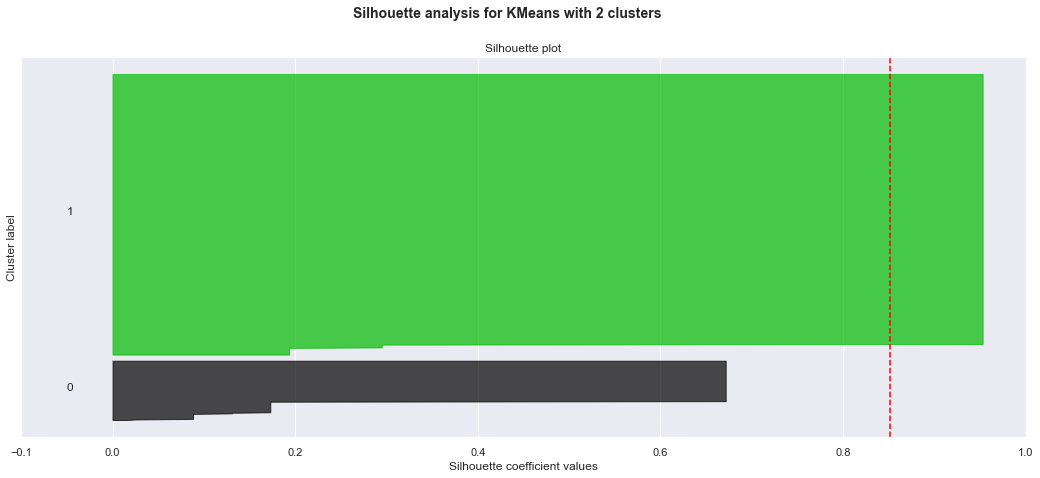

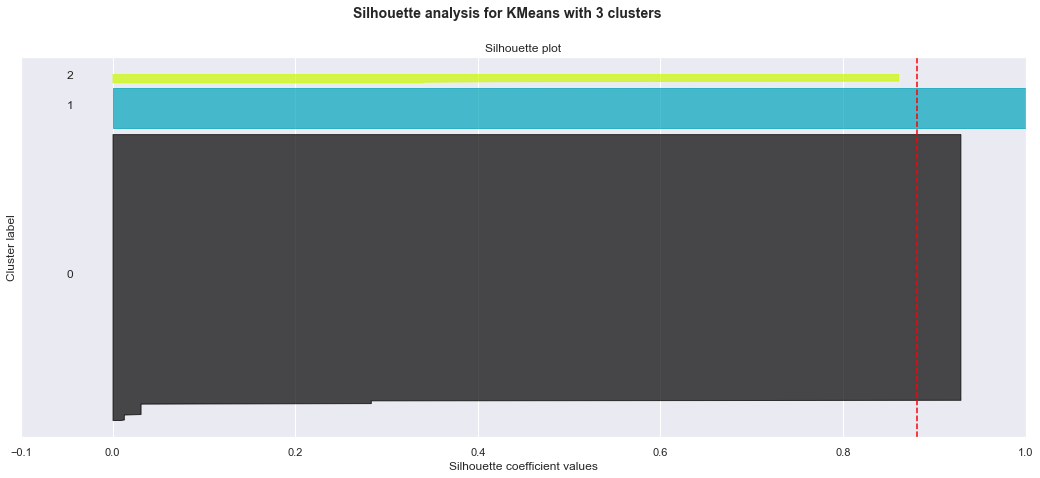

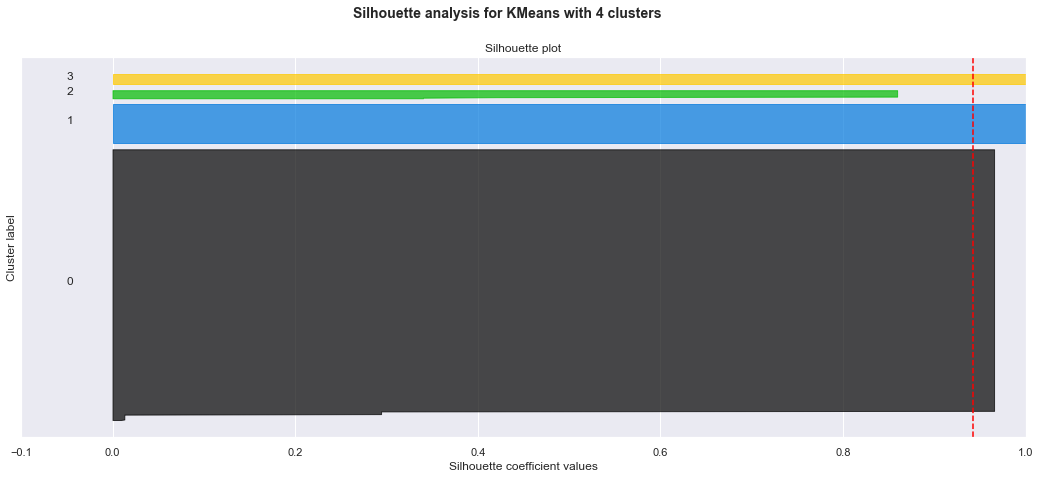

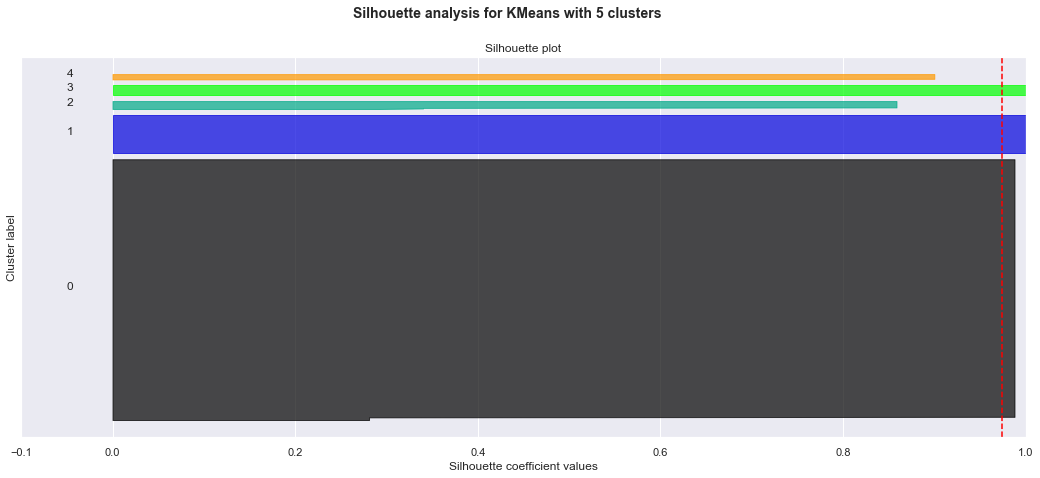

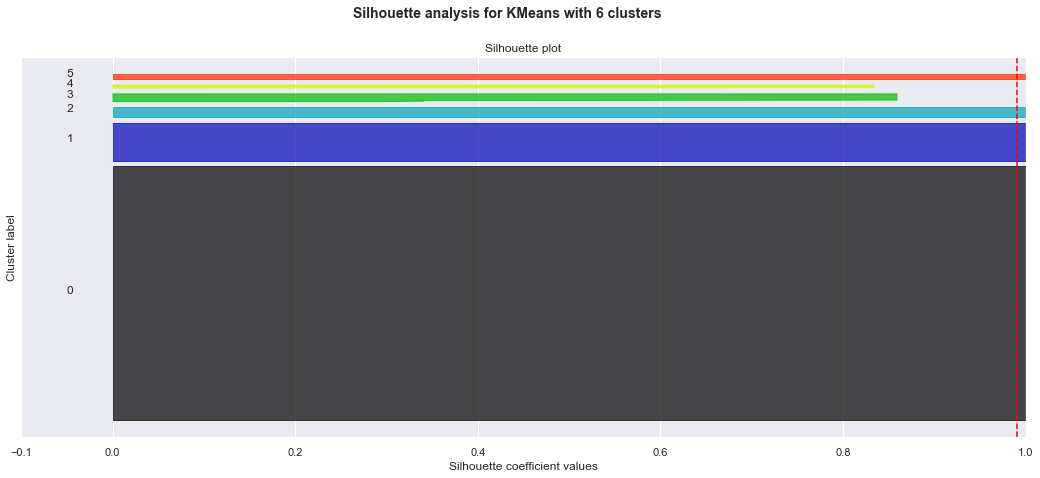

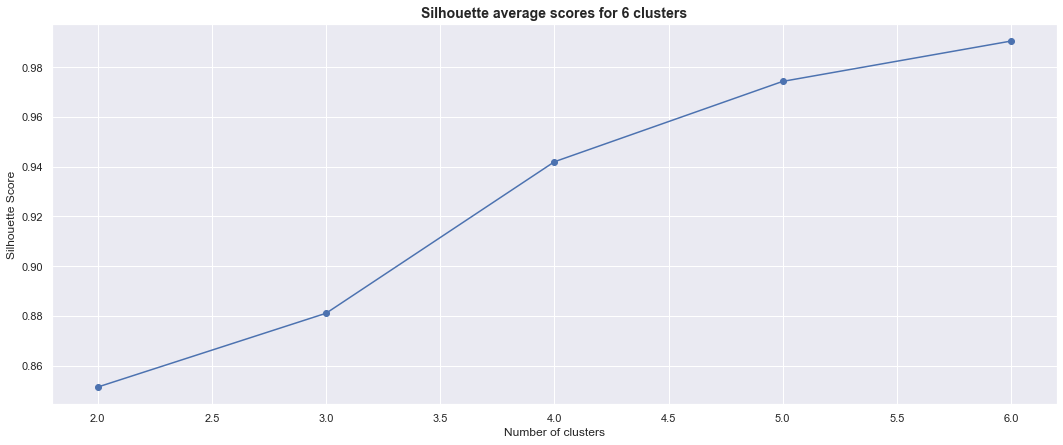

In [441]:
num_clusters = range(2,7) # we will analyse n_clusters from 2 to 7
silhouette_scores = []
SSE = []

for n_clusters in num_clusters:

    # Create a subplot
    fig, a = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initializing the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    kmeans.fit(Final_df2)

    labels_pred = kmeans.predict(Final_df2)

    #Computing the average silhouette_score
    sil_avg_score = metrics.silhouette_score(Final_df2, labels_pred)
    print("For",n_clusters, "clusters",
          "the average silhouette_score is :", sil_avg_score)

    # Computing the silhouette scores for each sample
    sil_samples_score = metrics.silhouette_samples(Final_df2, labels_pred)

    silhouette_scores.append(sil_avg_score)

    #Computing k means inertia for elbow analysis
    SSE.append(kmeans.inertia_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        sil_values = \
            sil_samples_score[labels_pred == i]
        sil_values.sort()

        size_cluster = sil_values.shape[0]
        y_upper = y_lower + size_cluster

        color = cm.nipy_spectral(float(i) / n_clusters)
        a.fill_betweenx(np.arange(y_lower, y_upper),
                          0, sil_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Adding cluster number label
        a.text(-0.05, y_lower + 0.5 * size_cluster, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting low plot limit to -0.1 since the aren't silhouettes from -0.1
    a.set_xlim([-0.1, 1])
    a.set_title("Silhouette plot")
    a.set_xlabel("Silhouette coefficient values")
    a.set_ylabel("Cluster label")

    # Adding line of average silhouette score
    a.axvline(x=sil_avg_score, color="red", linestyle="--")
    a.set_yticks([])  # Clear the yaxis labels / ticks
    a.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(('Silhouette analysis for KMeans with ' + str(n_clusters) + ' clusters'),
                 fontsize=14, fontweight='bold')

plt.show()

# Plot of silhouette average score values
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Silhouette average scores for ' + str(n_clusters) + ' clusters', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Silhouette Score')

plt.show()

C:\Users\shahi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


<Figure size 1080x504 with 0 Axes>

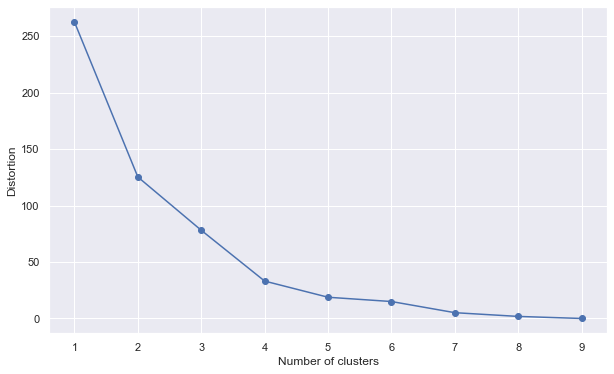

<Figure size 1080x504 with 0 Axes>

In [442]:
distortions = []
for i in range(1, 10):
    km = KMeans(n_clusters = i, init = 'random', n_init = 20, max_iter = 300, tol = 1e-04, random_state = 40)
    km.fit(Final_df2)
    distortions.append(km.inertia_)

    
# plot
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.savefig('kmeans')
plt.figure(figsize=(15,7))

In [302]:
kmeans = KMeans(n_clusters=2, random_state=10)
kmeans.fit(Host_1)
labels_1 = kmeans.predict(Host_1)

In [303]:
Final_df2["Cluster_1"]= labels_1

In [304]:
#Final_df2=Final_df2.drop(columns=['Cluster_0'])

In [305]:
Final_df2

,channel_id_5,channel_id_6,channel_id_8,content_type_4,content_type_8,geo_location_0,geo_location_1,geo_location_167,geo_location_1254,protocol_1,user_id_1.0,Cluster_1
193,0,1,0,1,0,0,1,0,0,1,1,0
268,0,1,0,1,0,0,1,0,0,1,1,0
272,0,1,0,1,0,0,1,0,0,1,1,0
291,0,1,0,1,0,0,1,0,0,1,1,0
360,0,1,0,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
87711,0,1,0,1,0,1,0,0,0,1,1,0
87751,0,1,0,1,0,0,1,0,0,1,1,0
87758,1,0,0,1,0,0,1,0,0,1,1,0
87853,0,1,0,1,0,0,1,0,0,1,1,0


In [306]:
Final_df2.nunique()

channel_id_5         2
channel_id_6         2
channel_id_8         2
content_type_4       2
content_type_8       2
geo_location_0       2
geo_location_1       2
geo_location_167     2
geo_location_1254    2
protocol_1           1
user_id_1.0          1
Cluster_1            2
dtype: int64

In [307]:
X= Final_df2.iloc[:, :-1]     #X is matrix of features and Y is dependent vector
y= Final_df2.iloc[:, 11].values

In [308]:
X

,channel_id_5,channel_id_6,channel_id_8,content_type_4,content_type_8,geo_location_0,geo_location_1,geo_location_167,geo_location_1254,protocol_1,user_id_1.0
193,0,1,0,1,0,0,1,0,0,1,1
268,0,1,0,1,0,0,1,0,0,1,1
272,0,1,0,1,0,0,1,0,0,1,1
291,0,1,0,1,0,0,1,0,0,1,1
360,0,1,0,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
87711,0,1,0,1,0,1,0,0,0,1,1
87751,0,1,0,1,0,0,1,0,0,1,1
87758,1,0,0,1,0,0,1,0,0,1,1
87853,0,1,0,1,0,0,1,0,0,1,1


In [309]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [310]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 40)

### Decision tree Classifier

In [311]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [312]:
y_predict = clf_model.predict(X_test)

In [313]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_predict)
from sklearn import svm
import pandas as pd

In [314]:
from sklearn.metrics import accuracy_score
# Create Linear SVM object
support = svm.LinearSVC(random_state=20)

In [315]:
# Train the model using the training sets and check score on test dataset
support.fit(X_train, y_train)
predicted= support.predict(X_test)
score=accuracy_score(y_test,predicted)
print("Your Model Accuracy is", score)

Your Model Accuracy is 1.0


In [317]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00         2

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



In [318]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[121,   0],
       [  0,   2]], dtype=int64)

## Random forest Classifier

In [319]:
from sklearn.ensemble import RandomForestClassifier
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  1.0


In [320]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00         2

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



In [321]:
confusion_matrix(y_test, y_pred)

array([[121,   0],
       [  0,   2]], dtype=int64)

In [322]:
#Hyperparameter tuning

In [323]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [324]:
%%time
classifier_rf.fit(X_train, y_train)

Wall time: 184 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [325]:
# checking the oob score
classifier_rf.oob_score_

1.0

In [326]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [327]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [328]:
from sklearn.model_selection import GridSearchCV

In [329]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [330]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
Wall time: 22.9 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [331]:
grid_search.best_score_

0.9878048780487805

In [332]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=3, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=42)

# Host 11

In [333]:
Host_11=updated_df2.loc[updated_df2['host_id'] == 11]

In [334]:
Host_11

,channel_id,host_id,content_type,protocol,geo_location,user_id
196,6,11,4,1,1,1.0
208,6,11,4,1,1,1.0
245,6,11,4,1,1,1.0
350,6,11,4,1,1457,1.0
439,6,11,4,1,1,1.0
...,...,...,...,...,...,...
87828,6,11,4,1,1,1.0
87842,6,11,4,1,1,1.0
87919,6,11,4,1,1,1.0
87920,6,11,4,1,1,1.0


In [335]:
Host11_lb=updated_df2.loc[updated_df2['host_id'] == 11]

In [336]:
Host11_lb=Host11_lb.drop(columns=['host_id'])

In [337]:
Host11_lb

,channel_id,content_type,protocol,geo_location,user_id
196,6,4,1,1,1.0
208,6,4,1,1,1.0
245,6,4,1,1,1.0
350,6,4,1,1457,1.0
439,6,4,1,1,1.0
...,...,...,...,...,...
87828,6,4,1,1,1.0
87842,6,4,1,1,1.0
87919,6,4,1,1,1.0
87920,6,4,1,1,1.0


In [338]:
Host11_lb.nunique()

channel_id      2
content_type    2
protocol        1
geo_location    6
user_id         1
dtype: int64

In [339]:
#Host_11=Host_11.drop_duplicates()

In [340]:
Host_11

,channel_id,host_id,content_type,protocol,geo_location,user_id
196,6,11,4,1,1,1.0
208,6,11,4,1,1,1.0
245,6,11,4,1,1,1.0
350,6,11,4,1,1457,1.0
439,6,11,4,1,1,1.0
...,...,...,...,...,...,...
87828,6,11,4,1,1,1.0
87842,6,11,4,1,1,1.0
87919,6,11,4,1,1,1.0
87920,6,11,4,1,1,1.0


In [341]:
from sklearn.preprocessing import OneHotEncoder
Final_df3=pd.get_dummies(data=Host_11, columns=['channel_id','content_type','geo_location','protocol','user_id'])

In [342]:
Final_df3

,host_id,channel_id_6,channel_id_8,content_type_4,content_type_8,geo_location_0,geo_location_1,geo_location_396,geo_location_498,geo_location_1221,geo_location_1457,protocol_1,user_id_1.0
196,11,1,0,1,0,0,1,0,0,0,0,1,1
208,11,1,0,1,0,0,1,0,0,0,0,1,1
245,11,1,0,1,0,0,1,0,0,0,0,1,1
350,11,1,0,1,0,0,0,0,0,0,1,1,1
439,11,1,0,1,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87828,11,1,0,1,0,0,1,0,0,0,0,1,1
87842,11,1,0,1,0,0,1,0,0,0,0,1,1
87919,11,1,0,1,0,0,1,0,0,0,0,1,1
87920,11,1,0,1,0,0,1,0,0,0,0,1,1


In [343]:
Final_df3.nunique()

host_id              1
channel_id_6         2
channel_id_8         2
content_type_4       2
content_type_8       2
geo_location_0       2
geo_location_1       2
geo_location_396     2
geo_location_498     2
geo_location_1221    2
geo_location_1457    2
protocol_1           1
user_id_1.0          1
dtype: int64

In [344]:
Final_df3=Final_df3.drop(columns=['host_id'])

In [345]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.cm as cm

For 2 clusters the average silhouette_score is : 0.7755584115593702
For 3 clusters the average silhouette_score is : 0.9027062469001048
For 4 clusters the average silhouette_score is : 0.9875142807409452
For 5 clusters the average silhouette_score is : 0.9920168067226892


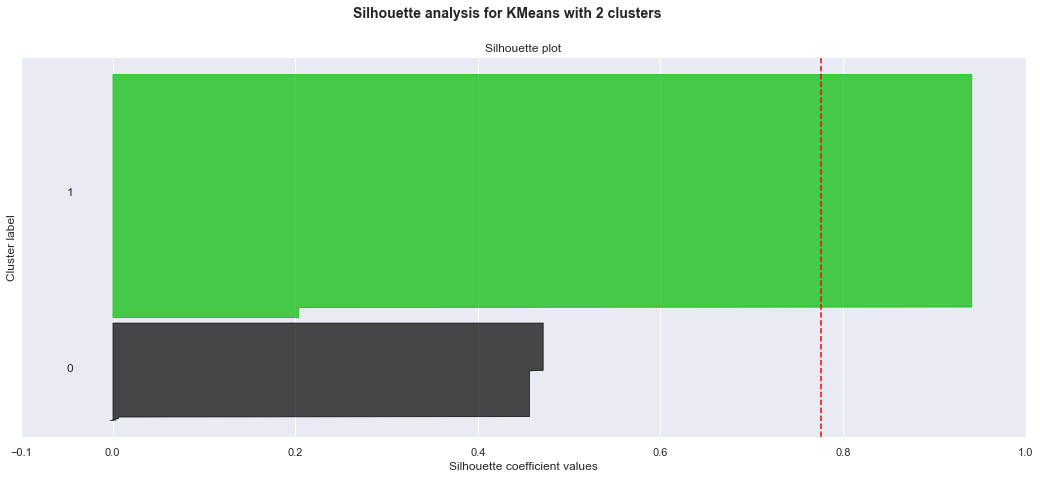

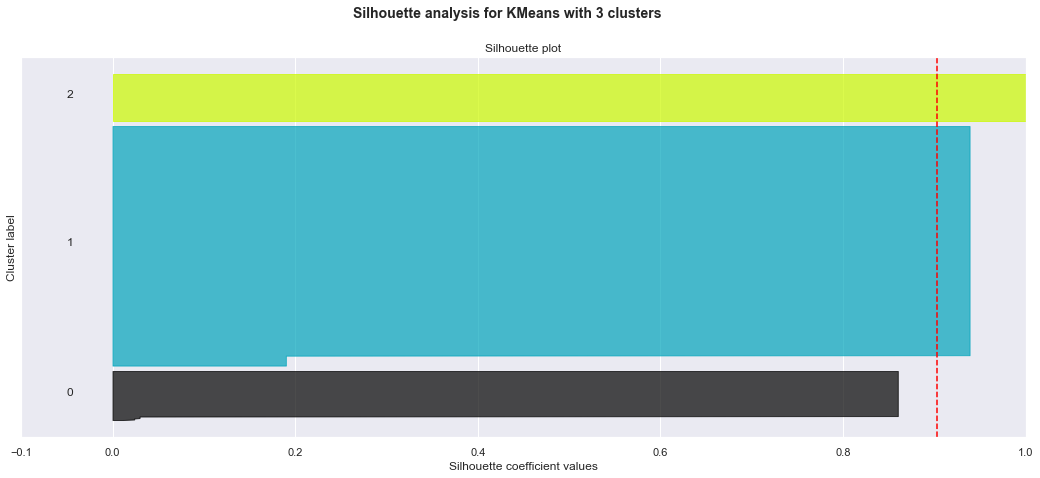

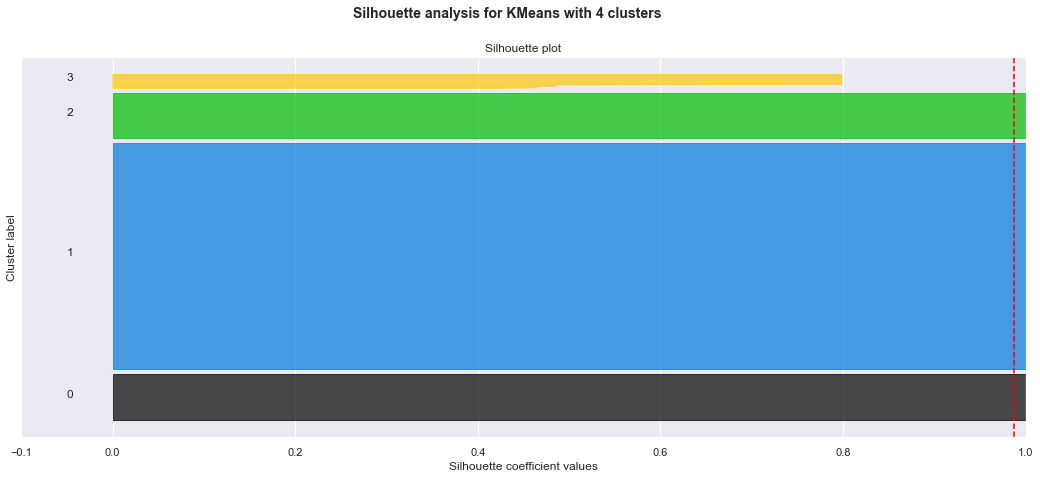

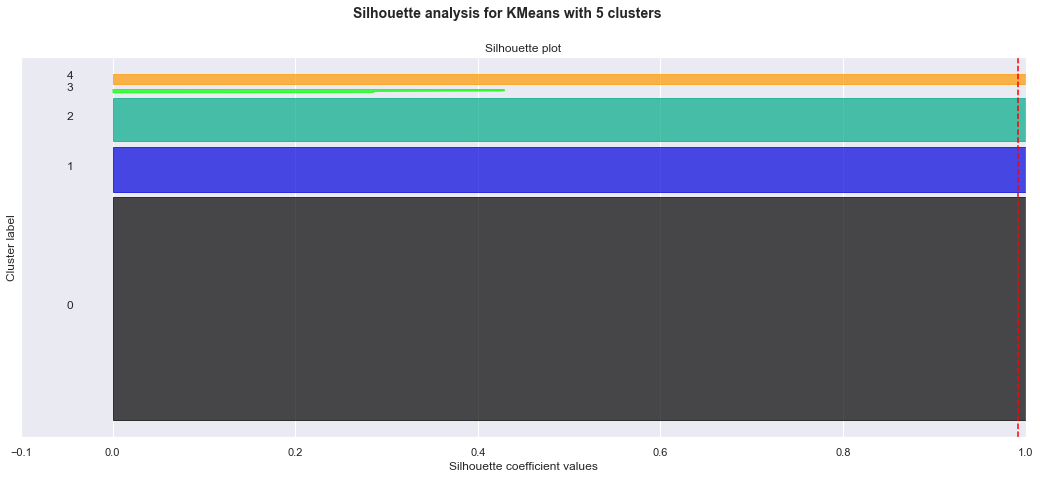

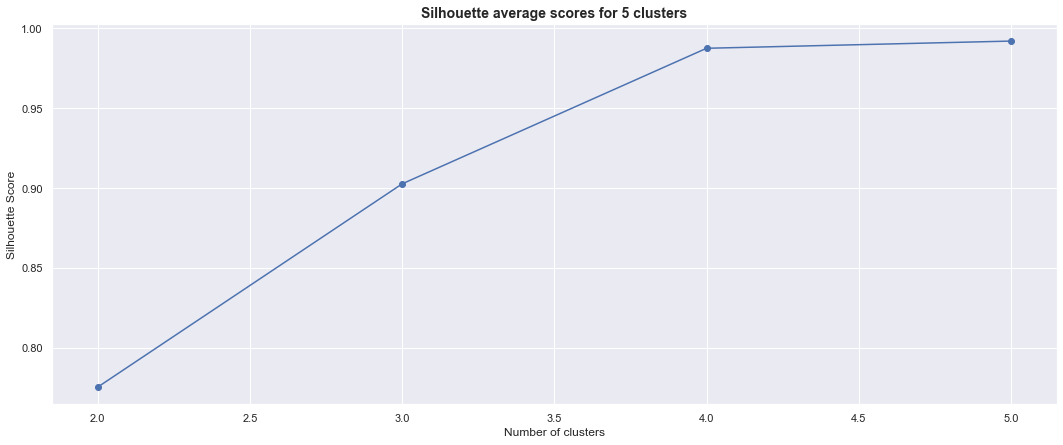

In [346]:
num_clusters = range(2,6) # we will analyse n_clusters from 2 to 7
silhouette_scores = []
SSE = []

for n_clusters in num_clusters:

    # Create a subplot
    fig, a = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # Initializing the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    kmeans.fit(Final_df3)

    labels_pred = kmeans.predict(Final_df3)

    #Computing the average silhouette_score
    sil_avg_score = metrics.silhouette_score(Final_df3, labels_pred)
    print("For",n_clusters, "clusters",
          "the average silhouette_score is :", sil_avg_score)

    # Computing the silhouette scores for each sample
    sil_samples_score = metrics.silhouette_samples(Final_df3, labels_pred)

    silhouette_scores.append(sil_avg_score)

    #Computing k means inertia for elbow analysis
    SSE.append(kmeans.inertia_)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        sil_values = \
            sil_samples_score[labels_pred == i]
        sil_values.sort()

        size_cluster = sil_values.shape[0]
        y_upper = y_lower + size_cluster

        color = cm.nipy_spectral(float(i) / n_clusters)
        a.fill_betweenx(np.arange(y_lower, y_upper),
                          0, sil_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Adding cluster number label
        a.text(-0.05, y_lower + 0.5 * size_cluster, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Setting low plot limit to -0.1 since the aren't silhouettes from -0.1
    a.set_xlim([-0.1, 1])
    a.set_title("Silhouette plot")
    a.set_xlabel("Silhouette coefficient values")
    a.set_ylabel("Cluster label")

    # Adding line of average silhouette score
    a.axvline(x=sil_avg_score, color="red", linestyle="--")
    a.set_yticks([])  # Clear the yaxis labels / ticks
    a.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(('Silhouette analysis for KMeans with ' + str(n_clusters) + ' clusters'),
                 fontsize=14, fontweight='bold')

plt.show()

# Plot of silhouette average score values
fig, a = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.title('Silhouette average scores for ' + str(n_clusters) + ' clusters', fontsize=14, fontweight='bold')
a.set_xlabel('Number of clusters')
a.set_ylabel('Silhouette Score')

plt.show()

C:\Users\shahi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


<Figure size 1080x504 with 0 Axes>

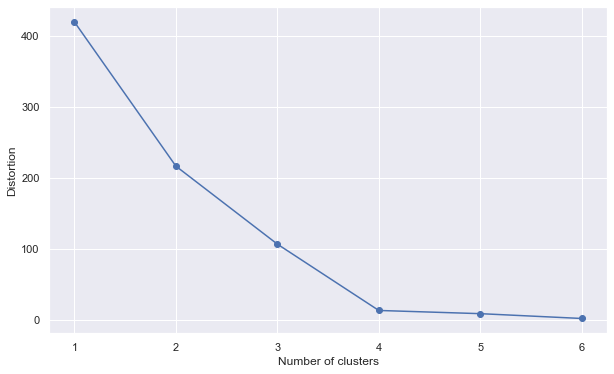

<Figure size 1080x504 with 0 Axes>

In [347]:
distortions = []
for i in range(1, 7):
    km = KMeans(n_clusters = i, init = 'random', n_init = 20, max_iter = 300, tol = 1e-04, random_state = 40)
    km.fit(Final_df3)
    distortions.append(km.inertia_)

    
# plot
plt.plot(range(1, 7), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.savefig('kmeans')
plt.figure(figsize=(15,7))

In [348]:
kmeans = KMeans(n_clusters=2, random_state=10)
kmeans.fit(Host_11)
labels_11 = kmeans.predict(Host_11)

In [349]:
Final_df3["Cluster_11"]= labels_11

In [350]:
Final_df3

,channel_id_6,channel_id_8,content_type_4,content_type_8,geo_location_0,geo_location_1,geo_location_396,geo_location_498,geo_location_1221,geo_location_1457,protocol_1,user_id_1.0,Cluster_11
196,1,0,1,0,0,1,0,0,0,0,1,1,0
208,1,0,1,0,0,1,0,0,0,0,1,1,0
245,1,0,1,0,0,1,0,0,0,0,1,1,0
350,1,0,1,0,0,0,0,0,0,1,1,1,1
439,1,0,1,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87828,1,0,1,0,0,1,0,0,0,0,1,1,0
87842,1,0,1,0,0,1,0,0,0,0,1,1,0
87919,1,0,1,0,0,1,0,0,0,0,1,1,0
87920,1,0,1,0,0,1,0,0,0,0,1,1,0


In [351]:
Final_df3.nunique()

channel_id_6         2
channel_id_8         2
content_type_4       2
content_type_8       2
geo_location_0       2
geo_location_1       2
geo_location_396     2
geo_location_498     2
geo_location_1221    2
geo_location_1457    2
protocol_1           1
user_id_1.0          1
Cluster_11           2
dtype: int64

In [352]:
X= Final_df3.iloc[:, :-1]     #X is matrix of features and Y is dependent vector
y= Final_df3.iloc[:, 12].values

In [353]:
X

,channel_id_6,channel_id_8,content_type_4,content_type_8,geo_location_0,geo_location_1,geo_location_396,geo_location_498,geo_location_1221,geo_location_1457,protocol_1,user_id_1.0
196,1,0,1,0,0,1,0,0,0,0,1,1
208,1,0,1,0,0,1,0,0,0,0,1,1
245,1,0,1,0,0,1,0,0,0,0,1,1
350,1,0,1,0,0,0,0,0,0,1,1,1
439,1,0,1,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
87828,1,0,1,0,0,1,0,0,0,0,1,1
87842,1,0,1,0,0,1,0,0,0,0,1,1
87919,1,0,1,0,0,1,0,0,0,0,1,1
87920,1,0,1,0,0,1,0,0,0,0,1,1


In [354]:
y

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [355]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 40)

## Decision tree classifier

In [356]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
clf_model.fit(X_train,y_train)
y_predict = clf_model.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_predict)
from sklearn import svm
import pandas as pd
from sklearn.metrics import accuracy_score
# Create Linear SVM object
support = svm.LinearSVC(random_state=20)

# Train the model using the training sets and check score on test dataset
support.fit(X_train, y_train)
predicted= support.predict(X_test)
score=accuracy_score(y_test,predicted)
print("Your Model Accuracy is", score)

Your Model Accuracy is 1.0


In [358]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       176
           1       1.00      1.00      1.00        28

    accuracy                           1.00       204
   macro avg       1.00      1.00      1.00       204
weighted avg       1.00      1.00      1.00       204



In [360]:
confusion_matrix(y_test, y_predict)

array([[176,   0],
       [  0,  28]], dtype=int64)

### Random forest classifier

In [361]:
from sklearn.ensemble import RandomForestClassifier
#creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  1.0


In [362]:
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       176
           1       1.00      1.00      1.00        28

    accuracy                           1.00       204
   macro avg       1.00      1.00      1.00       204
weighted avg       1.00      1.00      1.00       204



array([[176,   0],
       [  0,  28]], dtype=int64)

In [363]:
#Hyperparamter tuning

In [364]:
from sklearn.ensemble import RandomForestClassifier

In [365]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [366]:
%%time
classifier_rf.fit(X_train, y_train)

Wall time: 196 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [367]:
# checking the oob score
classifier_rf.oob_score_

1.0

In [368]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [369]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [370]:
from sklearn.model_selection import GridSearchCV

In [371]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [372]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
Wall time: 27.3 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [373]:
grid_search.best_score_

0.9936974789915967

In [374]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=42)

In [375]:
rf_best.feature_importances_

array([2.24489014e-03, 3.22944470e-04, 1.29603349e-03, 0.00000000e+00,
       0.00000000e+00, 4.38634722e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.57501410e-01, 0.00000000e+00, 0.00000000e+00])

In [376]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})